https://colab.research.google.com/drive/1-zs3rm9ickBXd0oj6yiy5U8PpW_ywHF_

In [0]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4359 sha256=cab0eb01707095fe87c08d1548b08e7ea93c21d2a99660987aeab62385782cef
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import selectivesearch
import cv2

In [0]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg

--2019-09-19 07:11:48--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2019-09-19 07:11:49--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc57ae0f6d8a1c736794d1670ae2.dl.dropboxusercontent.com/cd/0/inline/Ao2b3Uvp7U0AHsScVLavTFhJ0yqbxehqfH8oPwqMqLmZ2CO2SuDilb1USEz8PgI8DpxzdszHl6fo_f0Hj9CJe0Jdrulz_jCmywc13F5v95pMzw/file# [following]
--2019-09-19 07:11:49--  https://uc57ae0f6d8a1c736794d1670ae2.dl.dropboxusercontent.com/cd/0/inline/Ao2b3Uvp7U0AHsScVLavTFhJ0yqbxehqfH8oPwqMqLmZ2CO2SuDilb1USEz8PgI8DpxzdszHl6fo_f0Hj9CJe0Jdrulz_jCmywc13F5v95pMzw/file
Resolving uc57ae0f6

In [0]:
img = cv2.imread('/content/Hemanvi.jpeg')

In [0]:
img_lbl, regions = selectivesearch.selective_search(img, scale=100, min_size=2000)

In [0]:
print(len(regions))
candidates = set()
for r in regions:
     if r['rect'] in candidates:
         continue
 # excluding regions smaller than 2000 pixels
     if r['size'] < 2000:
         continue
     x, y, w, h = r['rect']
     candidates.add(r['rect'])

33


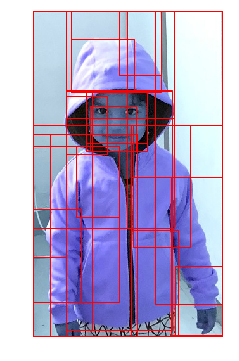

In [0]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for x, y, w, h in candidates:
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
plt.axis('off')
plt.show()